# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [4]:
import pandas as pd
df = pd.read_csv('multipleChoiceResponses_cleaned.csv',encoding='latin1')
df.head()

/Users/stevenkyle/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, comp

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['FormalEducation']

0                                        Bachelor's degree
1                                          Master's degree
2                                          Master's degree
3                                          Master's degree
4                                          Doctoral degree
                               ...                        
26389                                      Master's degree
26390                                    Bachelor's degree
26391                                                  NaN
26392                               I prefer not to answer
26393    I did not complete any formal education past h...
Name: FormalEducation, Length: 26394, dtype: object

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [6]:
import flatiron_stats as fs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/stevenkyle/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [51]:
subset = df[(~df['FormalEducation'].isnull()) & (~df['AdjustedCompensation'].isnull())]
FormalBach= subset[subset['FormalEducation']=="Bachelor's degree"]['AdjustedCompensation']
FormalMaster= subset[subset['FormalEducation']=="Master's degree"]['AdjustedCompensation']

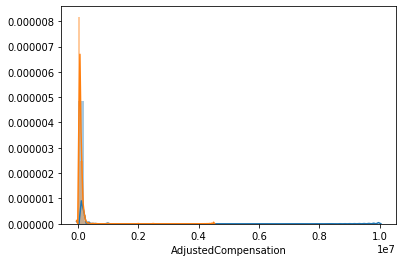

In [21]:
sns.distplot(FormalBach)
sns.distplot(FormalMaster)

In [52]:
print('Bachelor mean adjusted compensation:', FormalBach.mean())
print('Master mean adjusted compensation:', FormalMaster.mean())
print('Sample Sizes for Bachelor and Master', len(FormalBach), len(FormalMaster))
print('Welch test pval:', fs.p_value_welch_ttest(FormalBach,FormalMaster))

Bachelor mean adjusted compensation: 64887.097994618794
Master mean adjusted compensation: 69139.8998712
Sample Sizes for Bachelor and Master 1107 1990
Welch test pval: 0.33077639451272445


In [39]:
#Lookin at outliers
print(FormalBach.quantile(q=.99),FormalBach.quantile(q=1))
print(FormalMaster.quantile(q=.99),FormalMaster.quantile(q=1))

250000.0 9999999.0
250000.0 4498900.0


In [58]:
#Removed outliers
FormalBach= subset[(subset['FormalEducation']=="Bachelor's degree") &
                   (subset['AdjustedCompensation'] <= 500000)]['AdjustedCompensation']
FormalMaster= subset[(subset['FormalEducation']=="Master's degree") &
                    (subset['AdjustedCompensation'] <= 500000)]['AdjustedCompensation']

In [59]:
#After outliers were removed
print('Bachelor mean adjusted compensation:', FormalBach.mean())
print('Master mean adjusted compensation:', FormalMaster.mean())
print('Sample Sizes for Bachelor and Master', len(FormalBach), len(FormalMaster))
print('Welch test pval:', fs.p_value_welch_ttest(FormalBach,FormalMaster))

Bachelor mean adjusted compensation: 53744.35038988486
Master mean adjusted compensation: 63976.63281797885
Sample Sizes for Bachelor and Master 1103 1985
Welch test pval: 4.4874583271514723e-07


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [30]:
FormalDoct= subset[subset['FormalEducation']=="Doctoral degree"]['AdjustedCompensation']
print('Bachelor mean adjusted compensation:', FormalBach.mean())
print('Doc mean adjusted compensation:', FormalDoct.mean())
print('Sample Sizes for Bachelor and Doctoral', len(FormalBach), len(FormalDoct))
print('Welch test pval:', fs.p_value_welch_ttest(FormalBach,FormalDoct))

Bachelor mean adjusted compensation: 64887.097994618794
Doc mean adjusted compensation: 29566175.762453098
Sample Sizes for Bachelor and Doctoral 1107 967
Welch test pval: 0.15682381994720251


In [60]:
#Lookin at outliers
print(FormalBach.quantile(q=.99),FormalBach.quantile(q=1))
print(FormalDoct.quantile(q=.99),FormalDoct.quantile(q=1))

224900.00000000012 470000.0
336800.00000000064 28297400000.0


In [61]:
#Taking outliers out
FormalDoct= subset[(subset['FormalEducation']=="Doctoral degree") &
                    (subset['AdjustedCompensation'] <= 500000)]['AdjustedCompensation']

In [62]:
#Results after outliers were taken out
print('Bachelor mean adjusted compensation:', FormalBach.mean())
print('Doc mean adjusted compensation:', FormalDoct.mean())
print('Sample Sizes for Bachelor and Doctoral', len(FormalBach), len(FormalDoct))
print('Welch test pval:', fs.p_value_welch_ttest(FormalBach,FormalDoct))

Bachelor mean adjusted compensation: 53744.35038988486
Doc mean adjusted compensation: 86194.98163085165
Sample Sizes for Bachelor and Doctoral 1103 964
Welch test pval: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula,df).fit()
table = sm.stats.anova_lm(lm,typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [65]:
temp = df[df['AdjustedCompensation'] <= 500000]
lm = ols(formula,temp).fit()
table = sm.stats.anova_lm(lm,typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!